/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


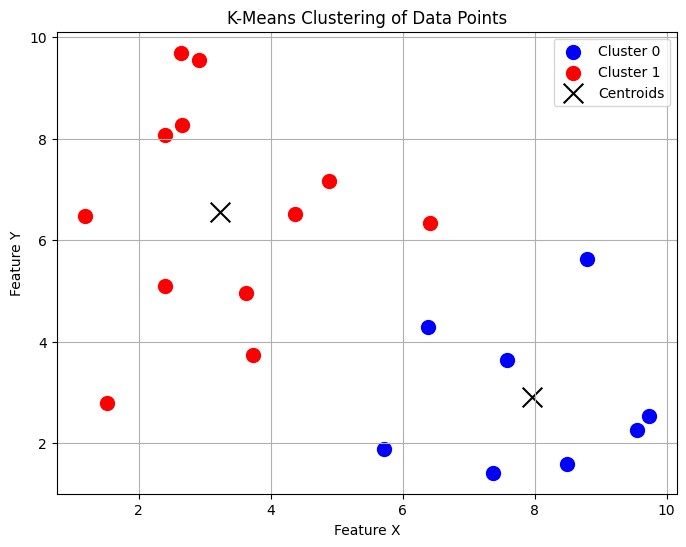

In [1]:
#4
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to generate random training data
def generate_train_data(seed=42, size=20):
    np.random.seed(seed)
    X_train = np.random.uniform(1, 10, size)
    Y_train = np.random.uniform(1, 10, size)
    return X_train, Y_train

# Function to perform K-Means clustering
def perform_kmeans(train_data, n_clusters=2, seed=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=seed)
    kmeans.fit(train_data)
    return kmeans.labels_, kmeans.cluster_centers_

# Function to plot K-Means clustering results
def plot_kmeans_clustering(X_train, Y_train, cluster_labels, centroids):
    plt.figure(figsize=(8, 6))

    plt.scatter(X_train[cluster_labels == 0], Y_train[cluster_labels == 0],
                color='blue', label='Cluster 0', s=100)
    plt.scatter(X_train[cluster_labels == 1], Y_train[cluster_labels == 1],
                color='red', label='Cluster 1', s=100)

    plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', s=200, label='Centroids')

    plt.xlabel('Feature X')
    plt.ylabel('Feature Y')
    plt.title('K-Means Clustering of Data Points')
    plt.legend()
    plt.grid(True)
    plt.show()

# Main function to coordinate the process
def main():
    X_train, Y_train = generate_train_data(seed=42, size=20)
    train_data = np.column_stack((X_train, Y_train))

    cluster_labels, centroids = perform_kmeans(train_data, n_clusters=2, seed=42)

    plot_kmeans_clustering(X_train, Y_train, cluster_labels, centroids)

# Example usage
main()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


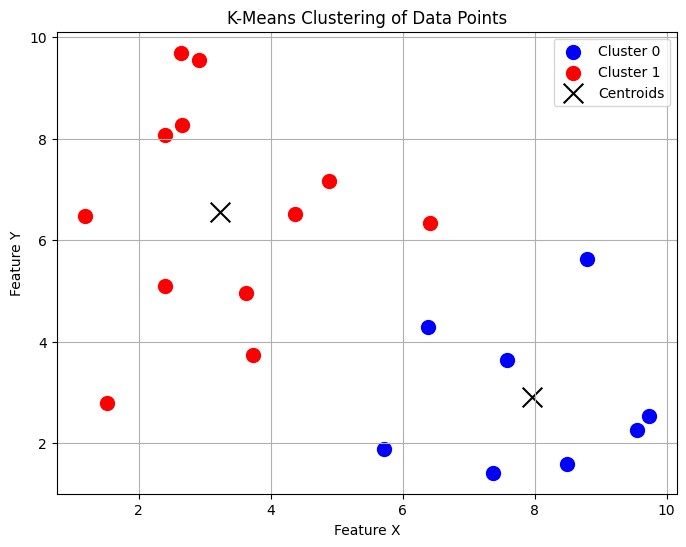

Silhouette Score: 0.48855389709460273
Calinski-Harabasz (CH) Score: 29.356441672853304
Davies-Bouldin (DB) Index: 0.7023191207161514


In [2]:
#5
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Function to calculate clustering evaluation metrics
def calculate_clustering_metrics(train_data, cluster_labels):
    silhouette = silhouette_score(train_data, cluster_labels)
    ch_score = calinski_harabasz_score(train_data, cluster_labels)
    db_index = davies_bouldin_score(train_data, cluster_labels)

    return silhouette, ch_score, db_index

# Function to print clustering evaluation metrics
def print_clustering_metrics(silhouette, ch_score, db_index):
    print("Silhouette Score:", silhouette)
    print("Calinski-Harabasz (CH) Score:", ch_score)
    print("Davies-Bouldin (DB) Index:", db_index)

# Main function to coordinate the process
def main():
    # Generate train data and perform K-Means clustering
    X_train, Y_train = generate_train_data(seed=42, size=20)
    train_data = np.column_stack((X_train, Y_train))
    cluster_labels, centroids = perform_kmeans(train_data, n_clusters=2, seed=42)

    # Plot clustering results
    plot_kmeans_clustering(X_train, Y_train, cluster_labels, centroids)

    # Calculate and print clustering metrics
    silhouette, ch_score, db_index = calculate_clustering_metrics(train_data, cluster_labels)
    print_clustering_metrics(silhouette, ch_score, db_index)

# Example usage
main()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

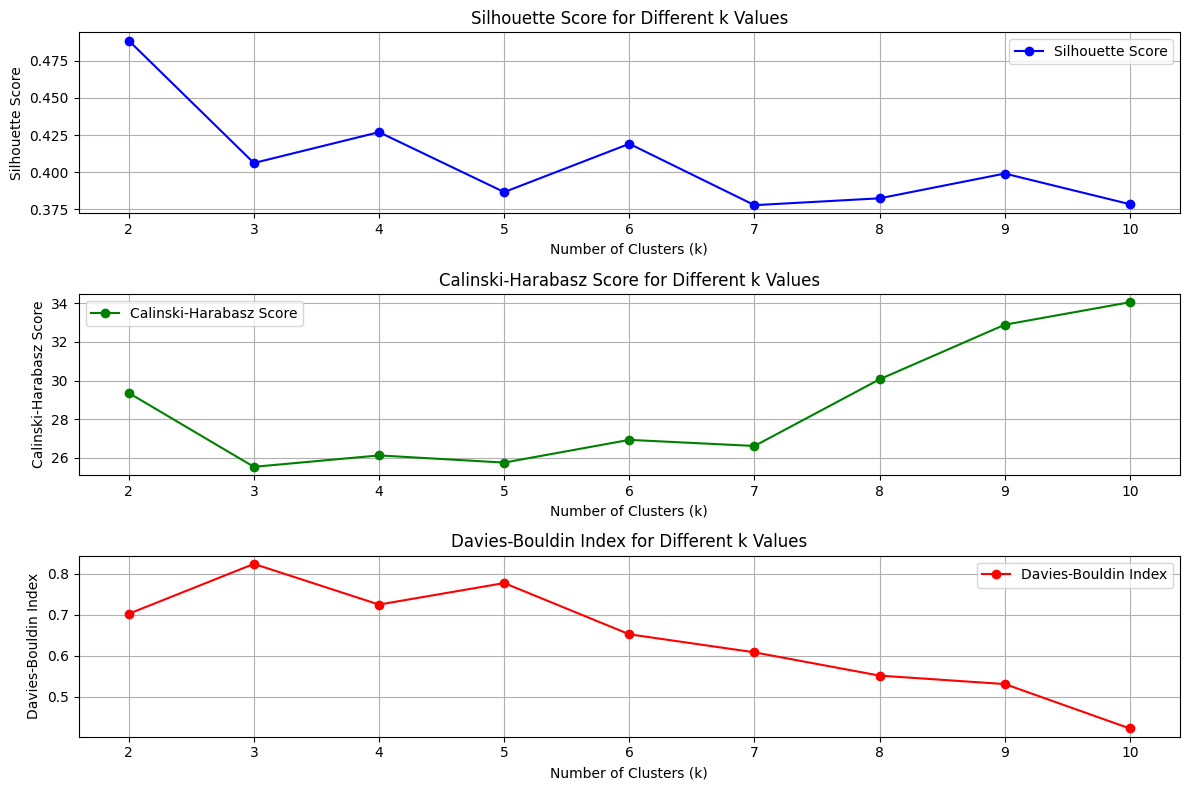

In [3]:
#6
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Function to generate random training data
def generate_train_data(seed=42, size=20):
    np.random.seed(seed)
    X_train = np.random.uniform(1, 10, size)
    Y_train = np.random.uniform(1, 10, size)
    return X_train, Y_train

# Function to calculate clustering metrics for different k values
def evaluate_clustering_metrics(train_data, k_values):
    silhouette_scores = []
    ch_scores = []
    db_indices = []

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        cluster_labels = kmeans.fit_predict(train_data)

        silhouette = silhouette_score(train_data, cluster_labels)
        ch_score = calinski_harabasz_score(train_data, cluster_labels)
        db_index = davies_bouldin_score(train_data, cluster_labels)

        silhouette_scores.append(silhouette)
        ch_scores.append(ch_score)
        db_indices.append(db_index)

    return silhouette_scores, ch_scores, db_indices

# Function to plot clustering metrics
def plot_clustering_metrics(k_values, silhouette_scores, ch_scores, db_indices):
    plt.figure(figsize=(12, 8))

    plt.subplot(3, 1, 1)
    plt.plot(k_values, silhouette_scores, marker='o', color='blue', label='Silhouette Score')
    plt.title('Silhouette Score for Different k Values')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 2)
    plt.plot(k_values, ch_scores, marker='o', color='green', label='Calinski-Harabasz Score')
    plt.title('Calinski-Harabasz Score for Different k Values')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Calinski-Harabasz Score')
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()

    plt.subplot(3, 1, 3)
    plt.plot(k_values, db_indices, marker='o', color='red', label='Davies-Bouldin Index')
    plt.title('Davies-Bouldin Index for Different k Values')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Davies-Bouldin Index')
    plt.xticks(k_values)
    plt.grid(True)
    plt.legend()

    plt.tight_layout()
    plt.show()

# Main function to coordinate the process
def main():
    X_train, Y_train = generate_train_data(seed=42, size=20)
    train_data = np.column_stack((X_train, Y_train))

    k_values = range(2, 11)
    silhouette_scores, ch_scores, db_indices = evaluate_clustering_metrics(train_data, k_values)

    plot_clustering_metrics(k_values, silhouette_scores, ch_scores, db_indices)

# Example usage
main()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

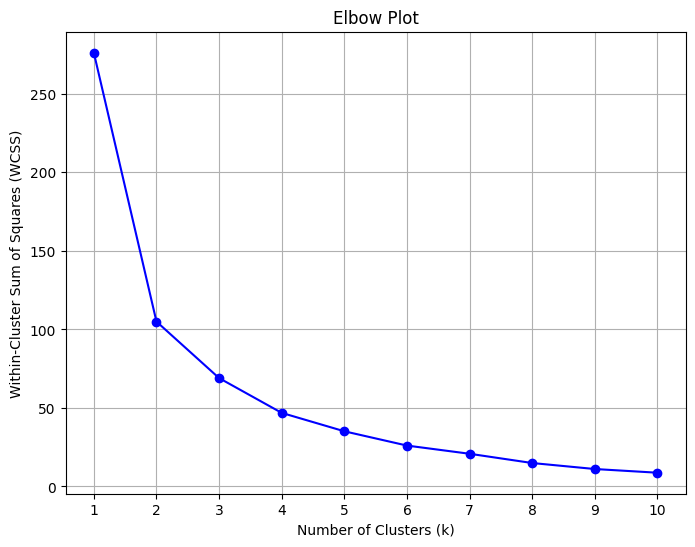

In [4]:
#7
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to generate random training data
def generate_train_data(seed=42, size=20):
    np.random.seed(seed)
    X_train = np.random.uniform(1, 10, size)
    Y_train = np.random.uniform(1, 10, size)
    return X_train, Y_train

# Function to compute WCSS for different k values
def compute_wcss(train_data, k_values):
    wcss = []
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(train_data)
        wcss.append(kmeans.inertia_)
    return wcss

# Function to plot the Elbow Plot
def plot_elbow_plot(k_values, wcss):
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, wcss, marker='o', color='blue')
    plt.title('Elbow Plot')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
    plt.xticks(k_values)
    plt.grid(True)
    plt.show()

# Main function to coordinate the process
def main():
    X_train, Y_train = generate_train_data(seed=42, size=20)
    train_data = np.column_stack((X_train, Y_train))

    k_values = range(1, 11)
    wcss = compute_wcss(train_data, k_values)

    plot_elbow_plot(k_values, wcss)

# Example usage
main()
